In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import os
import cv2
import random
import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jrsq6xao because the default path (/gpfs/home/sc9295/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
loss_function = "SSIM_test"
# loss_function2 = "SSIM_test_normalized"
exclude_list = ["Nonspecific white matter lesion","Normal variant"]

In [3]:
abnormal_root = f'/gpfs/data/knolllab/knolllabspace/data/fastMRI_brain_public/val_pathology_evaluation/{loss_function}/abnormal'
nomral_root = f'/gpfs/data/knolllab/knolllabspace/data/fastMRI_brain_public/val_pathology_evaluation/{loss_function}/normal'
random_root = f'/gpfs/data/knolllab/knolllabspace/data/fastMRI_brain_public/val_pathology_evaluation/{loss_function}/random'

In [4]:
acc_list = [2,4,6,8,10,12]
data_list = []
for acc in acc_list:
    data_acc = pd.read_csv(os.path.join(abnormal_root,str(acc),'output.csv')).drop(columns=['Unnamed: 0'])
    data_list.append(data_acc)
    
df_abnormal = pd.concat(data_list)
df_abnormal['Type'] = 'abnormal'
# df_abnormal.loc[(df_abnormal['Annotation'].isin(exclude_list)), 'Exclude'] = True
# df_abnormal.loc[-(df_abnormal['Annotation'].isin(exclude_list)), 'Exclude'] = False
df_abnormal

,Sample,Slice,Annotation#,Annotation,Level,Acc,mse,nmse,psnr,ssim,pixel_mean,pixel_std,Type
0,file_brain_AXFLAIR_200_6002425,2,0,Nonspecific white matter lesion,Slice_Level,2,9.172984e-12,0.001190,42.768685,0.971697,0.000065,0.000059,abnormal
1,file_brain_AXFLAIR_200_6002425,2,0,Nonspecific white matter lesion,Bounding box,2,1.966293e-11,0.000924,32.322377,0.977704,0.000148,0.000015,abnormal
2,file_brain_AXFLAIR_200_6002425,5,0,Nonspecific white matter lesion,Slice_Level,2,7.772340e-12,0.001142,41.740375,0.962279,0.000061,0.000056,abnormal
3,file_brain_AXFLAIR_200_6002425,5,0,Nonspecific white matter lesion,Bounding box,2,9.845825e-12,0.000508,34.240456,0.961255,0.000138,0.000010,abnormal
4,file_brain_AXFLAIR_200_6002425,5,1,Nonspecific white matter lesion,Slice_Level,2,7.772340e-12,0.001142,41.740375,0.962279,0.000061,0.000056,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15135,file_brain_AXT1_206_2060085,12,0,Craniotomy,Bounding box,12,8.464978e-10,0.011195,27.365527,0.889692,0.000222,0.000166,abnormal
15136,file_brain_AXT1_206_2060097,8,0,Mass,Slice_Level,12,3.578599e-10,0.012934,32.290985,0.899054,0.000105,0.000108,abnormal
15137,file_brain_AXT1_206_2060097,8,0,Mass,Bounding box,12,8.618999e-10,0.035739,16.146899,0.463602,0.000130,0.000008,abnormal
15138,file_brain_AXT1_206_2060097,8,1,Edema,Slice_Level,12,3.578599e-10,0.012934,32.290985,0.899054,0.000105,0.000108,abnormal


In [5]:
df_abnormal

,Sample,Slice,Annotation#,Annotation,Level,Acc,mse,nmse,psnr,ssim,pixel_mean,pixel_std,Type
0,file_brain_AXFLAIR_200_6002425,2,0,Nonspecific white matter lesion,Slice_Level,2,9.172984e-12,0.001190,42.768685,0.971697,0.000065,0.000059,abnormal
1,file_brain_AXFLAIR_200_6002425,2,0,Nonspecific white matter lesion,Bounding box,2,1.966293e-11,0.000924,32.322377,0.977704,0.000148,0.000015,abnormal
2,file_brain_AXFLAIR_200_6002425,5,0,Nonspecific white matter lesion,Slice_Level,2,7.772340e-12,0.001142,41.740375,0.962279,0.000061,0.000056,abnormal
3,file_brain_AXFLAIR_200_6002425,5,0,Nonspecific white matter lesion,Bounding box,2,9.845825e-12,0.000508,34.240456,0.961255,0.000138,0.000010,abnormal
4,file_brain_AXFLAIR_200_6002425,5,1,Nonspecific white matter lesion,Slice_Level,2,7.772340e-12,0.001142,41.740375,0.962279,0.000061,0.000056,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15135,file_brain_AXT1_206_2060085,12,0,Craniotomy,Bounding box,12,8.464978e-10,0.011195,27.365527,0.889692,0.000222,0.000166,abnormal
15136,file_brain_AXT1_206_2060097,8,0,Mass,Slice_Level,12,3.578599e-10,0.012934,32.290985,0.899054,0.000105,0.000108,abnormal
15137,file_brain_AXT1_206_2060097,8,0,Mass,Bounding box,12,8.618999e-10,0.035739,16.146899,0.463602,0.000130,0.000008,abnormal
15138,file_brain_AXT1_206_2060097,8,1,Edema,Slice_Level,12,3.578599e-10,0.012934,32.290985,0.899054,0.000105,0.000108,abnormal


In [6]:
acc_list = [2,4,6,8,10,12]
data_list = []
for acc in acc_list:
    data_acc = pd.read_csv(os.path.join(random_root,str(acc),'output.csv')).drop(columns=['Unnamed: 0'])
    data_list.append(data_acc)
    
df_random = pd.concat(data_list)
df_random['Type'] = 'random'
# df_random.loc[(df_random['Annotation'].isin(exclude_list)), 'Exclude'] = True
# df_random.loc[-(df_random['Annotation'].isin(exclude_list)), 'Exclude'] = False
df_random

,Sample,Slice,Annotation#,Annotation,Level,Acc,mse,nmse,psnr,ssim,pixel_mean,pixel_std,Type
0,file_brain_AXFLAIR_200_6002425,2,0,Nonspecific white matter lesion,Slice_Level,2,9.172984e-12,0.001190,42.768685,0.971697,0.000065,0.000059,random
1,file_brain_AXFLAIR_200_6002425,2,0,Nonspecific white matter lesion,Bounding box,2,9.262474e-12,0.000448,35.288924,0.984200,0.000143,0.000017,random
2,file_brain_AXFLAIR_200_6002425,5,0,Nonspecific white matter lesion,Slice_Level,2,7.772340e-12,0.001142,41.740375,0.962279,0.000061,0.000056,random
3,file_brain_AXFLAIR_200_6002425,5,0,Nonspecific white matter lesion,Bounding box,2,1.162475e-11,0.000672,32.790324,0.932401,0.000133,0.000007,random
4,file_brain_AXFLAIR_200_6002425,5,1,Nonspecific white matter lesion,Slice_Level,2,7.772340e-12,0.001142,41.740375,0.962279,0.000061,0.000056,random
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15135,file_brain_AXT1_206_2060085,12,0,Craniotomy,Bounding box,12,1.069203e-09,0.009687,25.755995,0.804989,0.000293,0.000165,random
15136,file_brain_AXT1_206_2060097,8,0,Mass,Slice_Level,12,3.578599e-10,0.012934,32.290985,0.899054,0.000105,0.000108,random
15137,file_brain_AXT1_206_2060097,8,0,Mass,Bounding box,12,2.534189e-09,0.014828,22.981490,0.961438,0.000388,0.000177,random
15138,file_brain_AXT1_206_2060097,8,1,Edema,Slice_Level,12,3.578599e-10,0.012934,32.290985,0.899054,0.000105,0.000108,random


In [7]:
data = [df_random,df_abnormal]
df_all = pd.concat(data)
df_all.to_csv('abnormal_random.csv',index=False)

In [8]:
# acc_list = [2,4,6,8,10,12]
# data_list = []
# for acc in acc_list:
#     data_acc = pd.read_csv(os.path.join(nomral_root,str(acc),'output.csv')).drop(columns=['Unnamed: 0'])
#     data_list.append(data_acc)
    
# df_normal = pd.concat(data_list)
# df_normal['Type'] = 'normal'
# # df_normal.loc[(df_normal['Annotation'].isin(exclude_list)), 'Exclude'] = True
# # df_normal.loc[-(df_normal['Annotation'].isin(exclude_list)), 'Exclude'] = False
# df_normal

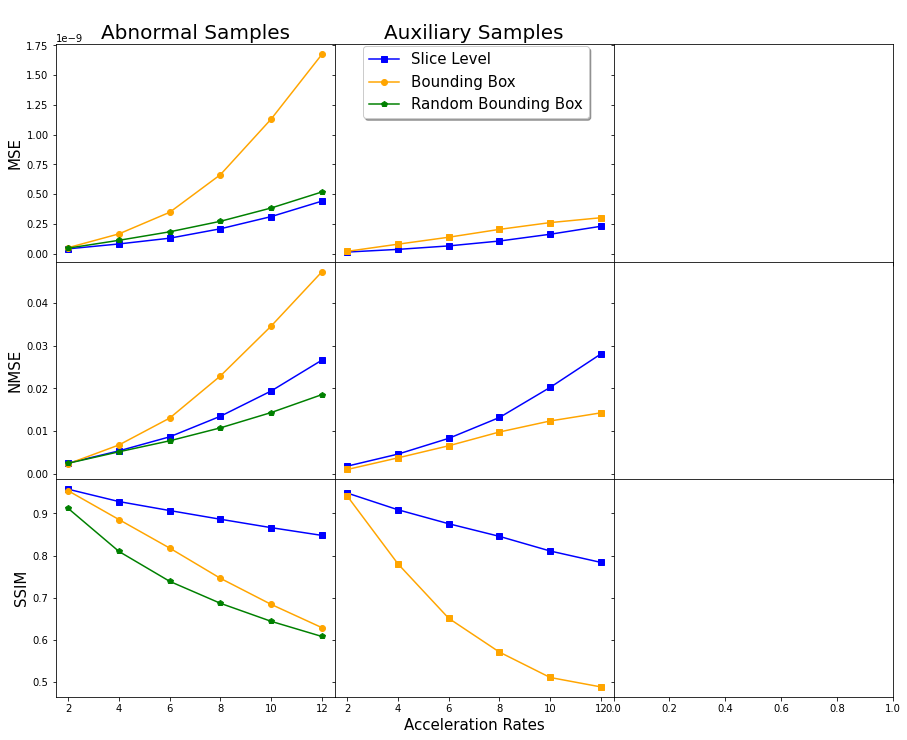

In [9]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(3, 3, hspace=0, wspace=0)
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)  = gs.subplots(sharex='col', sharey='row')
color_1 = 'blue'
color_2 = 'orange'
label_1 = 'Slice Level'
label_2 = 'Bounding Box'
label_3 = "Random Bounding Box"
x_font_size = 15
y_font_size = 15
title_font_size = 20

x = [2,4,6,8,10,12]

# 1-1
y_global = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
line1, = ax1.plot(x, y_global,'s-',color=color_1,label=label_1)
y_region = df_abnormal[(df_abnormal['Level']=='Bounding box')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
line2, = ax1.plot(x, y_region, 'o-',color=color_2,label=label_2)
y = df_random[(df_random['Level']=='Bounding box')&(-df_random['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
line3, = ax1.plot(x, y,'p-',color='g',label=label_3)
ax1.set_title("Abnormal Samples",fontsize=title_font_size)
ax1.set_ylabel("MSE",fontsize=y_font_size)

# 1-2
y = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
ax2.plot(x, y,'s-',color=color_1,label=label_1)
y = df_abnormal[(df_abnormal['Level']=='Bounding box')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
ax2.plot(x, y,'s-',color=color_2,label=label_1)
ax2.set_title("Auxiliary Samples",fontsize=title_font_size)

# # 1-3
# y = df_normal[df_normal['Level']=='Slice_Level'].groupby('Acc').mean()['mse']
# ax3.plot(x, y,'s-',color=color_1,label=label_1)
# y = df_normal[df_normal['Level']=='Bounding box'].groupby('Acc').mean()['mse']
# ax3.plot(x, y, 'o-',color=color_2,label=label_2)
# ax3.set_title("Normal Samples",fontsize=title_font_size)

# 2-1
y = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
ax4.plot(x, y,'s-',color=color_1,label=label_1)
y = df_abnormal[(df_abnormal['Level']=='Bounding box')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
ax4.plot(x, y, 'o-',color=color_2,label=label_2)
y = df_random[(df_random['Level']=='Bounding box')&(-df_random['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
ax4.plot(x, y,'p-',color='g',label=label_3)
ax4.set_ylabel("NMSE",fontsize=y_font_size)

# 2-2
y = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
ax5.plot(x, y,'s-',color=color_1,label=label_1)
# line4, = ax2.plot(x, y, "*-", color='c',label=label_4)
y = df_abnormal[(df_abnormal['Level']=='Bounding box')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
ax5.plot(x, y,'s-',color=color_2,label=label_1)
# line4, = ax2.plot(x, y, "*-", color='c',label=label_4)

# # 2-3
# y = df_normal[df_normal['Level']=='Slice_Level'].groupby('Acc').mean()['nmse']
# ax6.plot(x, y,'s-',color=color_1,label=label_1)
# y = df_normal[df_normal['Level']=='Bounding box'].groupby('Acc').mean()['nmse']
# ax6.plot(x, y, 'o-',color=color_2,label=label_2)

# 3-1
y = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
ax7.plot(x, y,'s-',color=color_1,label=label_1)
y = df_abnormal[(df_abnormal['Level']=='Bounding box')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
ax7.plot(x, y,'o-',color=color_2,label=label_2)
y = df_random[(df_random['Level']=='Bounding box')&(-df_random['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
ax7.plot(x, y,'p-',color='g',label=label_3)
ax7.set_ylabel("SSIM",fontsize=y_font_size)
# ax7.set_xlabel('Acceleration Rates',fontsize=x_font_size)

# 3-2 
y = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
ax8.plot(x, y,'s-',color=color_1,label=label_1)
# line4, = ax2.plot(x, y, "*-", color='c',label=label_4)
y = df_abnormal[(df_abnormal['Level']=='Bounding box')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
ax8.plot(x, y,'s-',color=color_2,label=label_1)
ax8.set_xlabel('Acceleration Rates',fontsize=x_font_size)
# line4, = ax2.plot(x, y, "*-", color='c',label=label_4)
# ax8.set_xlabel('Acceleration Rates',fontsize=x_font_size)

# # 3-3
# y = df_normal[df_normal['Level']=='Slice_Level'].groupby('Acc').mean()['ssim']
# ax9.plot(x, y,'s-',color=color_1,label=label_1)
# y = df_normal[df_normal['Level']=='Bounding box'].groupby('Acc').mean()['ssim']
# ax9.plot(x, y,'o-',color=color_2,label=label_2)
# # y = df_abnormal[(df_abnormal['Level']=='Bounding box')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
# # ax8.plot(x, y,"*-", color='c',label=label_4)

# plt.legend(bbox_to_anchor =(1.35, 0.75))
fig.legend([line1, line2, line3], [label_1, label_2, label_3], loc = (0.4, 0.84), fontsize=15, shadow=True)


In [10]:
# # Some example data to display
# fig = plt.figure(figsize=(15,12))
# gs = fig.add_gridspec(3, 3, hspace=0, wspace=0)
# (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)  = gs.subplots(sharex='col', sharey='row')
# color_1 = 'blue'
# color_2 = 'orange'
# color_3 = 'grey'
# label_1 = 'Slice Level'
# label_2 = 'Bounding Box'
# label_3 = "Random Bounding Box"
# x_font_size = 15
# y_font_size = 15
# title_font_size = 20

# x = [2,4,6,8,10,12]

# # 1-1
# y_global = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
# line1, = ax1.plot(x, y_global,'s-',color=color_1,label=label_1)
# y_region = df_abnormal[(df_abnormal['Level']=='Bounding box')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
# line2, = ax1.plot(x, y_region, 'o-',color=color_2,label=label_2)
# ax1.bar(x,y_region-y_global,color=color_3)
# y = df_random[(df_random['Level']=='Bounding box')&(-df_random['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
# line3, = ax1.plot(x, y,'p-',color='g',label=label_3)
# ax1.set_title("Abnormal Samples",fontsize=title_font_size)
# ax1.set_ylabel("MSE",fontsize=y_font_size)

# # 1-2
# y_global = df_normal[df_normal['Level']=='Slice_Level'].groupby('Acc').mean()['mse']
# ax2.plot(x, y_global,'s-',color=color_1,label=label_1)
# y_region = df_normal[df_normal['Level']=='Bounding box'].groupby('Acc').mean()['mse']
# ax2.plot(x, y_region, 'o-',color=color_2,label=label_2)
# ax2.bar(x,y_region-y_global,color=color_3)
# ax2.set_title("Normal Samples",fontsize=title_font_size)

# # 1-3
# y_global = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
# ax3.plot(x, y_global,'s-',color=color_1,label=label_1)
# # line4, = ax2.plot(x, y, "*-", color='c',label=label_4)
# y_region = df_abnormal[(df_abnormal['Level']=='Bounding box')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['mse']
# ax3.plot(x, y_region,'s-',color=color_2,label=label_1)
# ax3.bar(x,y_region-y_global,color=color_3)
# ax3.set_title("Auxiliary Samples",fontsize=title_font_size)
# # line4, = ax2.plot(x, y, "*-", color='c',label=label_4)

# # 2-1
# y_global = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
# ax4.plot(x, y_global,'s-',color=color_1,label=label_1)
# y_region = df_abnormal[(df_abnormal['Level']=='Bounding box')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
# ax4.plot(x, y_region, 'o-',color=color_2,label=label_2)
# y = df_random[(df_random['Level']=='Bounding box')&(-df_random['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
# ax4.plot(x, y,'p-',color='g',label=label_3)
# ax4.bar(x,y_region-y_global,color=color_3)
# ax4.plot([2,12], [0, 0], color='red', linestyle='--', linewidth=2)
# ax4.set_ylabel("NMSE",fontsize=y_font_size)

# # 2-2
# y_global = df_normal[df_normal['Level']=='Slice_Level'].groupby('Acc').mean()['nmse']
# ax5.plot(x, y_global,'s-',color=color_1,label=label_1)
# y_region = df_normal[df_normal['Level']=='Bounding box'].groupby('Acc').mean()['nmse']
# ax5.plot(x, y_region, 'o-',color=color_2,label=label_2)
# ax5.bar(x,y_region-y_global,color=color_3)
# ax5.plot([2,12], [0, 0], color='red', linestyle='--', linewidth=2)

# # 2-3
# y_global = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
# ax6.plot(x, y_global,'s-',color=color_1,label=label_1)
# # line4, = ax2.plot(x, y, "*-", color='c',label=label_4)
# y_region = df_abnormal[(df_abnormal['Level']=='Bounding box')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['nmse']
# ax6.plot(x, y_region,'s-',color=color_2,label=label_1)
# ax6.bar(x,y_region-y_global,color=color_3)
# ax6.plot([2,12], [0, 0], color='red', linestyle='--', linewidth=2)

# # 3-1
# y_global = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
# ax7.plot(x, y_global,'s-',color=color_1,label=label_1)
# y_region = df_abnormal[(df_abnormal['Level']=='Bounding box')&(-df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
# ax7.plot(x, y_region,'o-',color=color_2,label=label_2)
# y = df_random[(df_random['Level']=='Bounding box')&(-df_random['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
# ax7.plot(x, y,'p-',color='g',label=label_3)
# ax7.bar(x,y_region-y_global,color=color_3)
# ax7.set_ylabel("SSIM",fontsize=y_font_size)
# ax7.plot([2,12], [0, 0], color='red', linestyle='--', linewidth=2)

# # 3-2
# y_global = df_normal[df_normal['Level']=='Slice_Level'].groupby('Acc').mean()['ssim']
# ax8.plot(x, y_global,'s-',color=color_1,label=label_1)
# y_region = df_normal[df_normal['Level']=='Bounding box'].groupby('Acc').mean()['ssim']
# ax8.plot(x, y_region,'o-',color=color_2,label=label_2)
# ax8.bar(x,y_region-y_global,color=color_3)
# ax8.plot([2,12], [0, 0], color='red', linestyle='--', linewidth=2)
# ax8.set_xlabel('Acceleration Rates',fontsize=x_font_size)

# # 3-3 
# y_global = df_abnormal[(df_abnormal['Level']=='Slice_Level')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
# ax9.plot(x, y_global,'s-',color=color_1,label=label_1)
# y_region = df_abnormal[(df_abnormal['Level']=='Bounding box')&(df_abnormal['Annotation'].isin(exclude_list))].groupby('Acc').mean()['ssim']
# ax9.plot(x, y_region,'s-',color=color_2,label=label_1)
# ax9.bar(x,y_region-y_global,color=color_3)
# ax9.plot([2,12], [0, 0], color='red', linestyle='--', linewidth=2)

# fig.legend([line1, line2, line3], [label_1, label_2, label_3], loc = (0.4, 0.84), fontsize=15, shadow=True)